## 9.模型训练

**学习目标**

1. 熟悉模型训练的流程和方法

2. 熟悉常用的损失函数和优化器

3. 能够选择合适的超参数训练出高精度模型

4. 熟练使用torchvision库

5. 会使用torch.save保存pth模型

****

### 9.1   ResNet18模型的训练步骤

训练一个卷积神经网络模型通常包括以下步骤：

（1）数据准备

准备数据集：收集并准备训练数据，包括图像、标注等。对数据进行预处理，如缩放、归一化、数据增强等。

划分数据集：将数据集划分为训练集、验证集和测试集。

（2）构建模型

定义模型结构：设计CNN的架构，包括卷积层、池化层、全连接层、激活函数等。

正则化技术：应用如Dropout、L2正则化等技术减少过拟合。

选择损失函数：根据任务类型选择合适的损失函数，如交叉熵损失（用于分类任务）或均方误差损失（用于回归任务）。

选择优化器：选择一个优化算法，如SGD（随机梯度下降）、Adam、RMSprop等。

设置学习率和超参数：设置学习率、批大小、训练轮数（epochs）、正则化参数等超参数。


（3）训练模型

初始化模型权重：使用适当的方法初始化模型的权重，如随机初始化或使用预训练模型的权重。

前向传播：在训练过程中，输入数据通过CNN模型进行前向传播，计算预测结果。

计算损失：使用损失函数计算模型预测与真实标签之间的差异。

反向传播：根据损失计算梯度，并通过反向传播算法更新模型的权重。

优化和调整：在训练过程中监控模型性能，使用验证集评估模型，调整超参数和模型结构。

（4）测试模型

模型评估：在测试集上评估模型的性能，使用各种指标如准确率、精确率、召回率等。

模型调优：根据评估结果对模型进行进一步的调优，如超参数调整、模型结构改进等。

保存和部署：训练完成后，保存模型的权重和结构，以便将来的部署和使用。

这些步骤构成了训练CNN模型的基本流程，实际操作中可能需要根据具体任务和数据集进行调整。


项目8：蝴蝶品种识别

<img src="./images/butterfly.jpg" style="zoom:100%;" />

蝴蝶是一类美丽的昆虫，属于鳞翅目（Lepidoptera）的蝴蝶科（Papilionidae）。它们以其丰富多彩的翅膀和优雅的飞行姿态而闻名。以下是关于蝴蝶的一些基本介绍：

形态特征：蝴蝶的翅膀通常覆盖着细小的鳞片，这些鳞片形成了各种图案和颜色。它们的身体细长，通常有三对足和一对触角。

生命周期：蝴蝶的生命周期包括四个阶段：卵、幼虫（毛虫）、蛹和成虫。从卵孵化成幼虫后，毛虫会大量进食并经历几次蜕皮，之后形成蛹。在蛹阶段，它们会经历变态，最终变成成虫。

食性：成虫蝴蝶主要以花蜜为食，而毛虫则根据种类不同，可能以特定植物的叶子为食。

繁殖：蝴蝶通过飞行和寻找合适的植物产卵来繁殖。雌蝴蝶会选择适合其幼虫生长的植物产卵。

生态作用：蝴蝶在生态系统中扮演着重要角色，包括作为传粉者帮助植物繁殖，以及作为食物链中的一环，为其他动物提供食物来源。

种类多样性：全世界已知的蝴蝶种类超过17,500种，它们分布在各种不同的生态环境中，从热带雨林到寒带地区。

保护问题：由于栖息地破坏、气候变化和农药使用等原因，一些蝴蝶种类面临生存威胁。保护蝴蝶的自然栖息地和生物多样性对于维护生态平衡至关重要。

文化意义：在不同的文化中，蝴蝶常常象征着变革、美丽、自由和灵魂。它们也常被用于艺术和文学作品中。

蝴蝶是自然界中的一个迷人现象，它们的多样性和生态作用提醒我们要珍惜和保护自然环境。

由于蝴蝶种类如此繁多，我们很难知道一种蝴蝶到底是什么品种的，现在我们想让计算机帮助我们识别蝴蝶，因此我们制作了蝴蝶数据集，并设计了识别模型。

数据集：
100种蝴蝶或飞蛾的数据集。所有图像已经处理为 224 X 224 X 3的jpg格式。
训练集由 12594 张图像组成，分为 100 个子目录，每个种类的蝴蝶或飞蛾一个子目录。
测试集由 500 张图像组成，分为 100 个子目录，每个种类的蝴蝶或飞蛾有 5 个测试图像。
验证集由 500 张图像组成，分为 100 个子目录，每个种类的蝴蝶或飞蛾有 5 个验证图像。

### 9.2  数据加载和预处理

1. **导入必需的模块**

torchvision是PyTorch的一个图形库，主要用来构建计算机视觉模型。torchvision包括以下的部分：

- torchvision.datasets： 加载数据的函数及常用的数据集接口；

- torchvision.models：  包含常用的模型结构（含预训练模型）；

- torchvision.transforms：常用的图片变换，例如裁剪、旋转等；

- torchvision.utils：其他的一些有用的方法。

In [1]:
import time
from matplotlib import pyplot as plt
from models import resnet18
import torch
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

2. **数据加载和预处理**

In [3]:
train_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

val_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [4]:
train_dataset = datasets.ImageFolder('./datasets/butterflies and moths/train', train_transform)
val_dataset = datasets.ImageFolder('./datasets/butterflies and moths/valid', val_transform)

In [5]:
train_dataloader = DataLoader(train_dataset, 64, shuffle=True, num_workers=4, pin_memory=True)
val_dataloader = DataLoader(val_dataset, 64, shuffle=False, num_workers=4, pin_memory=True)

至此，数据集加载和预处理的定义就完成了，接下来进行的就是模型的训练。

### 9.3  模型训练和测试

在上一个任务中，我们构建了一个ResNet18模型，同学们可以使用数据集来训练自己构建好的ResNet18模型。

1.参数设置

In [6]:
num_epochs = 30
learning_rate = 0.01
momentum = 0.9

num_category = len(train_dataset.classes)

2. **构建模型**

定义的模型放在`./models/resnet18.py`文件中，我们可以直接调用写好的Resnet18模型。

In [7]:
model = resnet18.resnet18(num_classes=num_category)
model = model.to(device)

print(model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Sequential()
  )
  (5): ResidualBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

2. **实例化损失函数（loss function)**

​		在利用深度神经网络做图像分类问题时，经常使用交叉熵作为损失函数，由于交叉熵涉及到计算每个类别的概率，所以交叉熵几乎每次都和sigmoid(或softmax)函数一起出现。我们用神经网络最后一层输出的情况，来看整个模型预测、获得损失和学习的流程：

- 神经网络最后一层得到每个类别的得分scores（也叫logits）；
- 该得分经过sigmoid(或softmax)函数获得概率输出；
- 模型预测的类别概率输出与真实类别的one hot形式进行交叉熵损失函数的计算。

In [8]:
loss_func = nn.CrossEntropyLoss()

3. **设置优化器（optimizer）**

​		神经网络优化器，主要是为了优化神经网络，使训练过程快起来，节省网络训练的时间。torch.optim内置了各种优化算法。要使用torch.optim，必须构造一个optimizer对象，这个对象能保存当前的参数状态并且基于计算梯度更新参数。要构造一个optimizer，必须给它一个包含参数（必须都是Variable对象）进行优化。我们可以指定optimizer的相关参数，比如学习率，权重衰减等。

​		普通的梯度下降算法，需要不断重复把训练集中所有的数据放入神经网络进行训练，这样会消耗大量的计算资源。使用SGD会把数据拆分后分批放入神经网络中计算。使用批数据很大程度上加速了神经网络的训练过程, 而且不会损失太多精度。

​		模型前面的特征提取网络的参数是通过 ImageNet 上的预训练模型获得的，只需使⽤较小的学习率进⾏微调。相⽐之下，输出层model.fc中的参数是随机初始化的，通常需要更⾼的学习率才能从头开始训练。在我们的项目代码里面，没有区分特征提取网络和输出层的学习率，统一设置为lr=0.001。

In [9]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=0, nesterov=True)

1. **模型训练**

​		我们直接调用内置的训练函数 train_cls和验证函数valid_cls。对于train_cls来说，第1个参数为训练的模型，第2个参数为加载的训练数据集，第3个参数loss_func为使用的损失函数，第4个参数为设置的优化器，第5个参数为训练时是否调用GPU。同样，valid_cls参数类似，不过因为验证时不需要改变网络参数，所以valid_cls函数就没有优化器的参数。我们训练模型的同时，可以打印训练过程中的关键指标，包括训练的周期数epoch、训练耗费的时长、训练loss和验证loss等来观察训练的效果。

In [10]:
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    since = time.time()
    train_loss = 0
    val_loss = 0
    
    # 模型训练
    model.train()
    for i, (data, labels) in enumerate(train_dataloader):
        data, labels = data.to(device), labels.to(device)
        
        outputs = model(data)
        loss = loss_func(outputs, labels.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    
    train_loss /= len(train_dataloader)
    train_losses.append(train_loss)
    
    # 模型验证
    model.eval()
    for i, (data, labels) in enumerate(val_dataloader):
        data, labels = data.to(device), labels.to(device)

        outputs = model(data)
        loss = loss_func(outputs, labels.long())
        
        val_loss += loss.item()
    
    val_loss /= len(val_dataloader)
    val_losses.append(val_loss)
    
    print(f'周期数 {epoch+1}, 耗时 {time.time()-since:.2f} 秒, 训练loss {train_loss:.5f}, 验证loss {val_loss:.5f}')

周期数 1, 耗时 23.17 秒, 训练loss 3.2111, 验证loss 2.6127
周期数 2, 耗时 22.43 秒, 训练loss 1.9700, 验证loss 1.6913
周期数 3, 耗时 22.33 秒, 训练loss 1.4132, 验证loss 1.3495
周期数 4, 耗时 22.80 秒, 训练loss 1.0840, 验证loss 1.4905
周期数 5, 耗时 22.65 秒, 训练loss 0.8957, 验证loss 1.1835
周期数 6, 耗时 22.50 秒, 训练loss 0.7623, 验证loss 1.0181
周期数 7, 耗时 22.44 秒, 训练loss 0.6609, 验证loss 1.0328
周期数 8, 耗时 22.29 秒, 训练loss 0.5811, 验证loss 0.9921
周期数 9, 耗时 21.49 秒, 训练loss 0.5047, 验证loss 0.9186
周期数 10, 耗时 21.57 秒, 训练loss 0.4538, 验证loss 1.1516
周期数 11, 耗时 21.77 秒, 训练loss 0.4098, 验证loss 0.9643
周期数 12, 耗时 21.43 秒, 训练loss 0.3695, 验证loss 0.6082
周期数 13, 耗时 21.54 秒, 训练loss 0.3323, 验证loss 0.5620
周期数 14, 耗时 21.60 秒, 训练loss 0.2871, 验证loss 0.5816
周期数 15, 耗时 21.53 秒, 训练loss 0.2604, 验证loss 0.6201
周期数 16, 耗时 21.49 秒, 训练loss 0.2272, 验证loss 0.6104
周期数 17, 耗时 21.81 秒, 训练loss 0.2115, 验证loss 0.5245
周期数 18, 耗时 21.52 秒, 训练loss 0.1928, 验证loss 0.5155
周期数 19, 耗时 21.63 秒, 训练loss 0.1619, 验证loss 0.5991
周期数 20, 耗时 21.80 秒, 训练loss 0.1447, 验证loss 0.4527
周期数 21, 耗时 21.61 秒, 训练loss 0.

5. **绘制损失曲线**

​		对于训练过程中的loss曲线的变化，我们可以将它可视化出来。loss曲线对于模型训练情况的评估非常重要，也是我们判断模型训练是否欠拟合或者过拟合的依据。我们使用matplotlib来绘制loss曲线,并将绘制的学习曲线显示出来。

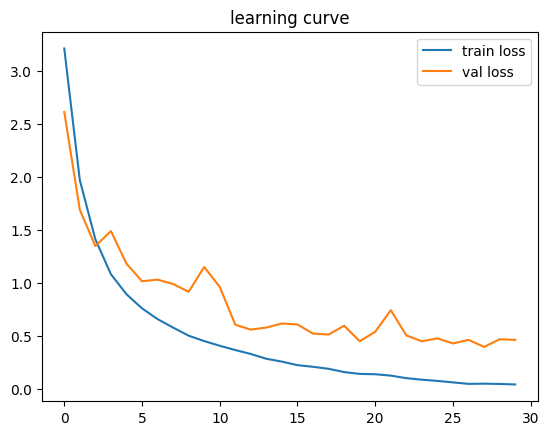

In [11]:
plt.title('learning curve')
train_loss, = plt.plot(train_losses, label='train loss')
val_loss, = plt.plot(val_losses, label='val loss')
plt.legend(handles=[train_loss, val_loss])
plt.show()

6. **模型测试**

​		最后，我们还需要测试下训练好的模型在整个验证集上的精度。我们可以直接调用内置的measure_accuracy函数来实现。

In [12]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    
    for images, labels in val_dataloader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    accuracy = correct / total
    print(f"Accuracy: {100 * accuracy:.2f}%")

Accuracy: 88.80%


7. 模型的保存

​		在前面的步骤中，我们讨论了如何加载和预处理数据，构建和训练模型，以及测试模型。当我们对所学的模型⾜够满意时，希望保存训练模型以备将来部署在各种设备中进行推理。此外，当运⾏⼀个耗时较⻓的训练过程时，最佳的做法是定期保存中间结果（检查点），以确保在服务器电源被不小⼼断掉时不会损失⼏天的计算结果。因此，我们需要知道如何加载和存储权重向量和整个模型。

​		PyTorch提供了内置函数来保存和加载整个⽹络。需要注意的是，下面的指令保存的是模型的参数而不是保存模型本身。当需要再次加载训练好的模型时，我们先要构建以前训练时的网络架构，然后加载模型参数到构建的网络中。

In [13]:
torch.save(model.state_dict(), './weights/resnet18.pth')

### 9.4   小结

1. save和load函数可⽤于张量对象的⽂件读写；我们可以通过参数字典保存和加载⽹络的全部参数；保存结构必须在代码中完成，而不是在参数中完成。